## INTRODUCTION CONTEST

![](https://mivia.unisa.it/onfire2023/assets/img/iciap_logo.jpg)
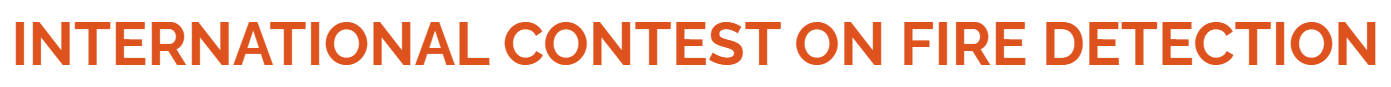

Dear Participant,

Thanks for your participation to ONFIRE Contest 2023.

Please download the following files:
- Training videos: https://drive.google.com/file/d/1tEz2wVQjPp1MjVHZLa-Z3uyVBnwljgGF/view?usp=sharing
- Training annotations: https://drive.google.com/file/d/123AcAQCldRNE6iKpXuCaVtsaR3uHIOeN/view?usp=sharing
- Code example: https://drive.google.com/file/d/1rXMCtpus2i2UDdSBD9RwWAxnT0wrrXOk/view?usp=sharing

Please remind that:
- The deadline for the submission of the methods is 21st July, 2023. The submission must be done with an email in which the participants share (directly or with external links) the trained model, the code and the report. The participants can receive the training set and its annotations by sending an email to onfire2023@unisa.it, in which they also communicate the name of the team.
- The participants can use these training samples and annotations, but also additional videos.
- The participants must submit their trained model and their code by carefully following the detailed instructions reported in the website.
- The participants are strongly encouraged to submit a contest paper to ICIAP 2023, whose deadline is 28th July, 2023. The contest paper must be also sent by email to the organizers. Otherwise, the participants must produce a brief PDF report of the proposed method.
- The detailed instructions of the proposed method can be downloaded here: https://mivia.unisa.it/onfire2023/

## Download and unzip

In [ ]:
# You can follow this tutorial for more information - https://www.tutorialspoint.com/google_colab/index.htm
# You can also see this video - https://www.youtube.com/watch?v=inN8seMm7UI

# Mount your Drive - After doing this step, your Google Drive folders are accessible from Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Serve a scaricare direttamente su Colab i dati. Conviene fare così rispetto a caricarli sul drive e poi ogni volta caricarli su Colab, poichè è molto lento.

I video son nel formato .mp4. Per ogni video c'è un file .rft che contiene tutte le informazioni.

Questo file contentiene dati in questo formato: num_frame,x
dove num_frame è l'indice del frame in cui è stato visualizzato x per la prima volta, invece x è fire o smoke (può essere utilizzata o meno).

In [ ]:
import gdown
def download_google_file(shader_url, output_name):
  id_url = "https://drive.google.com/uc?id=" + shader_url.split("/")[5]
  gdown.download(id_url, output_name)

In [ ]:
download_google_file("https://drive.google.com/file/d/1tEz2wVQjPp1MjVHZLa-Z3uyVBnwljgGF/view?usp=sharing", "VIDEOS.zip")
!unzip VIDEOS.zip

In [ ]:
download_google_file("https://drive.google.com/file/d/123AcAQCldRNE6iKpXuCaVtsaR3uHIOeN/view?usp=sharing", "GT.zip")
!unzip GT.zip
!mkdir -p GT/TRAINING_SET
!mv GT_TRAINING_SET_CL0 GT/TRAINING_SET/0
!mv GT_TRAINING_SET_CL1 GT/TRAINING_SET/1

In [ ]:
download_google_file("https://drive.google.com/file/d/1rXMCtpus2i2UDdSBD9RwWAxnT0wrrXOk/view?usp=sharing", "test_code.zip")
!unzip test_code.zip

In [ ]:
!ls

Rinomino le cartella estratte e rimuovo le cartelle che devo creare se esistono.

In [ ]:
!mv TRAINING_SET TEMP_VIDEO
!mv GT TEMP_GT

In [ ]:
!rm -R TRAINING_SET
!rm -R TEST_SET
!rm -R GT

In [ ]:
import numpy as np
import os

# List all files in dir
files_1 = os.listdir("TEMP_VIDEO/1")  # Video con fuoco
files_0 = os.listdir("TEMP_VIDEO/0")  # Video senza fuoco
# print(files_0)

# Select p_train(in %) of the files randomly
p_train=0.8
random_files_1 = np.random.choice(files_1, size=int(len(files_1)*p_train), replace=False)
random_files_0 = np.random.choice(files_0, size=int(len(files_0)*p_train), replace=False)

# Get the remaining files
other_files_1 = [x for x in files_1 if x not in random_files_1]
other_files_0 = [x for x in files_0 if x not in random_files_0]

# Creo le cartelle
# Per i video
os.mkdir("TRAINING_SET")
os.mkdir("TRAINING_SET/1")
os.mkdir("TRAINING_SET/0")
os.mkdir("TEST_SET")
os.mkdir("TEST_SET/1")
os.mkdir("TEST_SET/0")
# Per le label
os.mkdir("GT")
os.mkdir("GT/TRAINING_SET")
os.mkdir("GT/TRAINING_SET/1")
os.mkdir("GT/TRAINING_SET/0")
os.mkdir("GT/TEST_SET")
os.mkdir("GT/TEST_SET/1")
os.mkdir("GT/TEST_SET/0")

label_0_train=list()
label_1_train=list()
label_0_val=list()
label_1_val=list()

# Creo il training set
for x in random_files_0:
    source="TEMP_VIDEO/0/"+x
    dest="TRAINING_SET/0/"+x
    command="cp "+source+" "+dest
    os.system(command)
    label=x.replace("mp4","rtf")
    label_0_train.append(label)

#print(label_0_list)

for x in random_files_1:
    source="TEMP_VIDEO/1/"+x
    dest="TRAINING_SET/1/"+x
    command="cp "+source+" "+dest
    os.system(command)
    label=x.replace("mp4","rtf")
    label_1_train.append(label)

#print(label_1_list)

# Creo il validation set
for x in other_files_0:
    source="TEMP_VIDEO/0/"+x
    dest="TEST_SET/0/"+x
    command="cp "+source+" "+dest
    os.system(command)
    label=x.replace("mp4","rtf")
    label_0_val.append(label)

for x in other_files_1:
    source="TEMP_VIDEO/1/"+x
    dest="TEST_SET/1/"+x
    command="cp "+source+" "+dest
    os.system(command)
    label=x.replace("mp4","rtf")
    label_1_val.append(label)

# Ora suddivido le label
for x in label_0_train:
    source="TEMP_GT/TRAINING_SET/0/"+x
    dest="GT/TRAINING_SET/0/"+x
    command="cp "+source+" "+dest
    os.system(command)

for x in label_1_train:
    source="TEMP_GT/TRAINING_SET/1/"+x
    dest="GT/TRAINING_SET/1/"+x
    command="cp "+source+" "+dest
    os.system(command)

for x in label_0_val:
    source="TEMP_GT/TRAINING_SET/0/"+x
    dest="GT/TEST_SET/0/"+x
    command="cp "+source+" "+dest
    os.system(command)

for x in label_1_val:
    source="TEMP_GT/TRAINING_SET/1/"+x
    dest="GT/TEST_SET/1/"+x
    command="cp "+source+" "+dest
    os.system(command)


In [ ]:
# !cat GT/TRAINING_SET/0/Video0.rtf

print("Video:")
!ls TEMP_VIDEO/1 | wc -l
!ls TEMP_VIDEO/0 | wc -l

print("\nLabel:")
!ls TEMP_GT/TRAINING_SET/1 | wc -l
!ls TEMP_GT/TRAINING_SET/0 | wc -l

print("\nVideo train set:")
!ls TRAINING_SET/1 | wc -l
!ls TRAINING_SET/0 | wc -l

print("\nVideo test set:")
!ls TEST_SET/1 | wc -l
!ls TEST_SET/0 | wc -l

print("\nLabel train set:")
!ls GT/TRAINING_SET/1 | wc -l
!ls GT/TRAINING_SET/0 | wc -l

print("\nLabel test set:")
!ls GT/TEST_SET/1 | wc -l
!ls GT/TEST_SET/0 | wc -l

In [ ]:
!rm -R FRAMES

In [ ]:
videos_path1 = "TRAINING_SET"
videos_path2 = "TEST_SET"
frames_path = "FRAMES"

In [ ]:
import cv2, os, argparse, glob, PIL, tqdm

def extract_frames(video):
    # Process the video
    ret = True # è True fino a che ci sono frame nel video.
    cap = cv2.VideoCapture(video)
    f = 0
    while ret:
        ret, img = cap.read() # I frame vengono presi dalla read function e questo viene salvato in img (un numpy array)
        if ret:
            f += 1
            PIL.Image.fromarray(img).save(os.path.join(frames_path, video, "{:05d}.jpg".format(f))) # Con la PIL function salviamo l'array come immagine. Con il formato jpeg non sprechiamo troppo spazio ma perdiamo delle informazioni.
    cap.release()

#Con il codice sottostante prendiamo i path di tutti i video nelle directory. Poi salviamo tutti i frame nei frame_path che creiamo.

# For all the videos
file_list_training = [path for path in glob.glob(os.path.join(videos_path1,"**"), recursive=True) # glob.glob restituisce tutti i path di una directory. Ma noi siamo interessati solo ai file e quindi li prendiamo con os.path.isfile(path)
             if os.path.isfile(path)]

file_list_validation = [path for path in glob.glob(os.path.join(videos_path2,"**"), recursive=True) # glob.glob restituisce tutti i path di una directory. Ma noi siamo interessati solo ai file e quindi li prendiamo con os.path.isfile(path)
             if os.path.isfile(path)]
#print(file_list_training)
#print(file_list_validation)

for video in tqdm.tqdm(file_list_training): # Se ho già caricato i frame di questi video li skippo
  if os.path.isdir(os.path.join(frames_path, video)):
    continue
  os.makedirs(os.path.join(frames_path, video))
  #extract_frames(video) # Invece di chiamare la funzione di prima che è lenta utilizzo questa di sotto che è molto più veloce.
  os.system("ffmpeg -i {} -r 1/1 {}/{}/$Frame{}.jpg".format(video, frames_path, video, "%05d"))   # Senza -r estraggo tutti i frame del video, con -r estraggo un solo frame per secondo

for video in tqdm.tqdm(file_list_validation): # Se ho già caricato i frame di questi video li skippo
  #print(os.path.join(frames_path, video))
  if os.path.isdir(os.path.join(frames_path, video)):
    continue
  os.makedirs(os.path.join(frames_path, video))
  #extract_frames(video) # Invece di chiamare la funzione di prima che è lenta utilizzo questa di sotto che è molto più veloce.
  os.system("ffmpeg -i {} -r 1/1 {}/{}/$Frame{}.jpg".format(video, frames_path, video, "%05d"))


I video sono in mp4 format.
SIAMO INCORAGGIATI AD ESPANDERE IL TRAINING SET CON ALTRI VIDEO DA NOI TROVATI.
Per ogni video abbiamo dei file in formato .rtf che ci fanno delle informazioni.

GT sta per ground truth.

In GT_TRAINING_SET_CL0 i file rtf sono tutti vuoti. Mentre in GT_TRAINING_SET_CL1 contengono: indice del frame che è stato visualizzato il fuoco per la prima volta. Nota: in molti video già al frame 0 c'è del fuoco.
I risultati sul test set vengono fatti in questo modo.

## Estrazione dei frame dai video (per k-fold)

Per lavorare con video dobbiamo estrarre i frame dal video. Potremmo fare questo al volo, quindi ad ogni mini batch, durante la fase di training. Ma conviene estrarre tutto una volta e poi fare il training.

In [ ]:
videos_path = "TRAINING_SET"
frames_path = "FRAMES"

In [ ]:
!rm -R FRAMES/TRAINING_SET/

We use ffmpeg to faster the frame extraction

In [ ]:
import cv2, os, argparse, glob, PIL, tqdm

def extract_frames(video):
    # Process the video
    ret = True # è True fino a che ci sono frame nel video.
    cap = cv2.VideoCapture(video)
    f = 0
    while ret:
        ret, img = cap.read() # I frame vengono presi dalla read function e questo viene salvato in img (un numpy array)
        if ret:
            f += 1
            PIL.Image.fromarray(img).save(os.path.join(frames_path, video, "{:05d}.jpg".format(f))) # Con la PIL function salviamo l'array come immagine. Con il formato jpeg non sprechiamo troppo spazio ma perdiamo delle informazioni.
    cap.release()

#Con il codice sottostante prendiamo i path di tutti i video nelle directory. Poi salviamo tutti i frame nei frame_path che creiamo.

# For all the videos
file_list = [path for path in glob.glob(os.path.join(videos_path,"**"), recursive=True) # glob.glob restituisce tutti i path di una directory. Ma noi siamo interessati solo ai file e quindi li prendiamo con os.path.isfile(path)
             if os.path.isfile(path)]
#print(file_list)
for video in tqdm.tqdm(file_list): # Se ho già caricato i frame di questi video li skippo
  if os.path.isdir(os.path.join(frames_path, video)):
    continue

  os.makedirs(os.path.join(frames_path, video))
  #extract_frames(video)    # Invece di chiamare la funzione di prima che è lenta utilizzo questa di sotto che è molto più veloce.
  #estre tutti i frame
  os.system("ffmpeg -i {} {}/{}/$Frame{}.jpg".format(video, frames_path, video, "%05d"))
  #per estrarre : 1 frame per secondo
  #os.system("ffmpeg -i {} -r 1/1 {}/{}/$Frame{}.jpg".format(video, frames_path, video, "%05d"))



## Dataset Functions

Pythorch non implementa una classe per i video.
Albumentation è un package molto utile per il data agumentation per la computer vision. Può fare data agumentation sul input multipli.

Pytorch (torchvision) non fornisce dataset per video. La data augmentation non funziona molto bene su frame presi da un video. Quindi usiamo Albumentation.
Albumentation ci permette di fornire dati più complessi (un insieme di frame) che devono subire la stessa augmentation. Possiamo anche gestire i bouding box. La cosa importante è che ci permette di fare augmentation su frame di video.

We use strprtf to parse RTF files

In [ ]:
!pip install striprtf
!pip install torchinfo
import torchinfo

VideoRecord mantiene le informazioni riguardo ogni video annotazione. Es: i path del video, il primo e l'ultimo frame utilizzabile, la classe del video ecc ...

VideoFrameDataset invece è la struttura dati.

In [ ]:
import os
import os.path
import numpy as np
from PIL import Image
from torchvision import transforms
import torch
from typing import List, Union, Tuple, Any
from striprtf.striprtf import rtf_to_text
import albumentations


# ha le informazioni legate ad  ogni video, i metadati.
class VideoRecord(object):
    """
    Helper class for class VideoFrameDataset. This class
    represents a video sample's metadata.

    Args:
        root_datapath: the system path to the root folder of the videos.
        row: A list with four or more elements where
             1) The first element is the path to the video sample's frames excluding
             the root_datapath prefix
             2) The  second element is the starting frame id of the video
             3) The third element is the inclusive ending frame id of the video
             4) The fourth element is the label index.
             5) any following elements are labels in the case of multi-label classification
    """
    def __init__(self, row, root_datapath):
        self._data = row
        self._path = os.path.join(root_datapath, row[0])

    @property
    def path(self) -> str:
        return self._path

    @property
    def num_frames(self) -> int:
        return self.end_frame - self.start_frame + 1  # +1 because end frame is inclusive

    @property
    def start_frame(self) -> int:
        return int(self._data[1])

    @property
    def end_frame(self) -> int:
        return int(self._data[2])

    @property
    def label(self) -> Union[int, List[int]]:
        # just one label_id
        if len(self._data) == 4:
            return int(self._data[3])
        # sample associated with multiple labels
        else:
            return [int(label_id) for label_id in self._data[3:]]

# Il parametro test_mode serve per rendere non aleatoria l'estrazione dei frame dal segmento, ovvero prendere sempre gli stessi frame serve per la validation
class VideoFrameDataset(torch.utils.data.Dataset):
    r"""
    A highly efficient and adaptable dataset class for videos.
    Instead of loading every frame of a video,
    loads x RGB frames of a video (sparse temporal sampling) and evenly
    chooses those frames from start to end of the video, returning
    a list of x PIL images or ``FRAMES x CHANNELS x HEIGHT x WIDTH``
    tensors.

    More specifically, the frame range [START_FRAME, END_FRAME] is divided into NUM_SEGMENTS
    segments and FRAMES_PER_SEGMENT consecutive frames are taken from each segment.

    Note:
        A demonstration of using this class can be seen
        in ``demo.py``
        https://github.com/RaivoKoot/Video-Dataset-Loading-Pytorch

    Note:
        This dataset broadly corresponds to the frame sampling technique
        introduced in ``Temporal Segment Networks`` at ECCV2016
        https://arxiv.org/abs/1608.00859.

    Args:
        root_path: The root path in which video folders lie.
                   this is ROOT_DATA from the description above.
        num_segments: The number of segments the video should
                      be divided into to sample frames from.
        frames_per_segment: The number of frames that should
                            be loaded per segment. For each segment's
                            frame-range, a random start index or the
                            center is chosen, from which frames_per_segment
                            consecutive frames are loaded.
        imagefile_template: The image filename template that video frame files
                            have inside of their video folders as described above.
        transform: Transform pipeline that receives a list of numpy images/frames.
        test_mode: If True, frames are taken from the center of each
                   segment, instead of a random location in each segment.

    """
    def __init__(self,
                 root_path: str,
                 num_segments: int = 3,
                 frames_per_segment: int = 1,
                 imagefile_template: str='{:05d}.jpg',
                 transform=None,
                 totensor=True,
                 test_mode: bool = False):
        super(VideoFrameDataset, self).__init__()

        self.root_path = root_path
        self.num_segments = num_segments
        self.frames_per_segment = frames_per_segment
        self.imagefile_template = imagefile_template
        self.test_mode = test_mode

        if transform is None:
            self.transform = None
        else:
            additional_targets = {}
            for i in range(self.num_segments * self.frames_per_segment - 1):
                additional_targets["image%d" % i] = "image"
            self.transform = albumentations.Compose([transform],
                                                    additional_targets=additional_targets,
                                                    p=1)
        self.totensor = totensor
        self.totensor_transform = ImglistOrdictToTensor()

        self._parse_annotationfile()
        self._sanity_check_samples()

    def _load_image(self, directory: str, idx: int) -> Image.Image:
        return np.asarray(Image.open(os.path.join(directory, self.imagefile_template.format(idx))).convert('RGB'))

    def _parse_annotationfile(self):
        self.video_list = []
        for class_name in os.listdir(self.root_path):
            for video_name in os.listdir(os.path.join(self.root_path, class_name)):
                frames_dir = os.path.join(self.root_path, class_name, video_name)
                if os.path.isdir(frames_dir):
                    frame_path = os.path.join(class_name, video_name)
                    end_frame = len(os.listdir(frames_dir))

                    annotation_path = frames_dir\
                        .replace("\\", "/") \
                        .replace("FRAMES/", "GT/") \
                        .replace(".mp4", ".rtf")

                    with open(annotation_path, 'r') as file:
                        text = rtf_to_text(file.read())
                    if len(text):
                        label = 1
                        start_frame = int(text.split(",")[0])
                        if start_frame == 0:
                          start_frame = 1
                    else:
                        label = 0
                        start_frame = 1

                    self.video_list.append(VideoRecord(
                        [frame_path, start_frame, end_frame, label],
                        self.root_path))

    def _sanity_check_samples(self):
        for record in self.video_list:
            if record.num_frames <= 0 or record.start_frame == record.end_frame:
                print(f"\nDataset Warning: video {record.path} seems to have zero RGB frames on disk!\n")

            elif record.num_frames < (self.num_segments * self.frames_per_segment):
                print(f"\nDataset Warning: video {record.path} has {record.num_frames} frames "
                      f"but the dataloader is set up to load "
                      f"(num_segments={self.num_segments})*(frames_per_segment={self.frames_per_segment})"
                      f"={self.num_segments * self.frames_per_segment} frames. Dataloader will throw an "
                      f"error when trying to load this video.\n")

    def _get_start_indices(self, record: VideoRecord) -> 'np.ndarray[int]':
        """
        For each segment, choose a start index from where frames
        are to be loaded from.

        Args:
            record: VideoRecord denoting a video sample.
        Returns:
            List of indices of where the frames of each
            segment are to be loaded from.
        """
        # choose start indices that are perfectly evenly spread across the video frames.
        if self.test_mode:
            distance_between_indices = (record.num_frames - self.frames_per_segment + 1) / float(self.num_segments)

            start_indices = np.array([int(distance_between_indices / 2.0 + distance_between_indices * x)
                                      for x in range(self.num_segments)])
        # randomly sample start indices that are approximately evenly spread across the video frames.
        else:
            max_valid_start_index = (record.num_frames - self.frames_per_segment + 1) // self.num_segments

            start_indices = np.multiply(list(range(self.num_segments)), max_valid_start_index) + \
                      np.random.randint(max_valid_start_index, size=self.num_segments)

        return start_indices

    def __getitem__(self, idx: int) -> Union[
        Tuple[List[Image.Image], Union[int, List[int]]],
        Tuple['torch.Tensor[num_frames, channels, height, width]', Union[int, List[int]]],
        Tuple[Any, Union[int, List[int]]],
        ]:
        """
        For video with id idx, loads self.NUM_SEGMENTS * self.FRAMES_PER_SEGMENT
        frames from evenly chosen locations across the video.

        Args:
            idx: Video sample index.
        Returns:
            A tuple of (video, label). Label is either a single
            integer or a list of integers in the case of multiple labels.
            Video is either 1) a list of PIL images if no transform is used
            2) a batch of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH) in the range [0,1]
            if the transform "ImglistToTensor" is used
            3) or anything else if a custom transform is used.
        """
        record: VideoRecord = self.video_list[idx]

        frame_start_indices: 'np.ndarray[int]' = self._get_start_indices(record)

        return self._get(record, frame_start_indices)

    def _get(self, record: VideoRecord, frame_start_indices: 'np.ndarray[int]') -> Union[
        Tuple[List[Image.Image], Union[int, List[int]]],
        Tuple['torch.Tensor[num_frames, channels, height, width]', Union[int, List[int]]],
        Tuple[Any, Union[int, List[int]]],
        ]:
        """
        Loads the frames of a video at the corresponding
        indices.

        Args:
            record: VideoRecord denoting a video sample.
            frame_start_indices: Indices from which to load consecutive frames from.
        Returns:
            A tuple of (video, label). Label is either a single
            integer or a list of integers in the case of multiple labels.
            Video is either 1) a list of PIL images if no transform is used
            2) a batch of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH) in the range [0,1]
            if the transform "ImglistToTensor" is used
            3) or anything else if a custom transform is used.
        """

        frame_start_indices = frame_start_indices + record.start_frame
        images = list()

        # from each start_index, load self.frames_per_segment
        # consecutive frames
        for start_index in frame_start_indices:
            frame_index = int(start_index)

            # load self.frames_per_segment consecutive frames
            for _ in range(self.frames_per_segment):
                image = self._load_image(record.path, frame_index)
                images.append(image)

                if frame_index < record.end_frame:
                    frame_index += 1

        if self.transform is not None:
            transform_input = {"image": images[0]}
            for i, image in enumerate(images[1:]):
                transform_input["image%d" % i] = image
            images = self.transform(**transform_input)

        if self.totensor:
            images = self.totensor_transform(images)
        return images, record.label

    def __len__(self):
        return len(self.video_list)


class ImglistOrdictToTensor(torch.nn.Module):
    """
    Converts a list or a dict of numpy images to a torch.FloatTensor
    of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH).
    Can be used as first transform for ``VideoFrameDataset``.
    """
    @staticmethod
    def forward(img_list_or_dict):
        """
        Converts each numpy image in a list or a dict to
        a torch Tensor and stacks them into a single tensor.

        Args:
            img_list_or_dict: list or dict of numpy images.
        Returns:
            tensor of size ``NUM_IMAGES x CHANNELS x HEIGHT x WIDTH``
        """
        if isinstance(img_list_or_dict, list):
            return torch.stack([transforms.functional.to_tensor(img)
                                for img in img_list_or_dict])
        else:
            return torch.stack([transforms.functional.to_tensor(img_list_or_dict[k])
                                for k in img_list_or_dict.keys()])


In [ ]:
from torch.utils.data import Subset, DataLoader

# Function for the K-fold Cross Validation
def cross_val_dataloaders(train_dataset, val_dataset=None, K=10, batch_size=32):
  if val_dataset is None:
    val_dataset = train_dataset

  indexes = torch.randperm(len(train_dataset)) % K

  dataloader_params = {"batch_size": batch_size, "num_workers": 2, "pin_memory": True}

  train_folds, val_folds = [], []
  for k in range(K):

      val_fold   = Subset(val_dataset,   (indexes==k).nonzero().squeeze())
      train_fold = Subset(train_dataset, (indexes!=k).nonzero().squeeze())

      #print("train_fold: ", len(train_fold))

      val_fold   = DataLoader(val_fold,   shuffle=False, **dataloader_params)
      train_fold = DataLoader(train_fold, shuffle=True,  **dataloader_params)

      val_folds.append(val_fold)
      train_folds.append(train_fold)
  return train_folds, val_folds, indexes

## Tensorboard

In [ ]:
from torch.utils.tensorboard import SummaryWriter
from tensorboard import notebook

def start_tensorboard(log_dir):
  writer = SummaryWriter(os.path.join("runs", log_dir))

  # run tensorboard in background
  ! killall tensorboard
  %load_ext tensorboard
  %tensorboard --logdir ./runs

  notebook.list() # View open TensorBoard instances

  return writer

## K-Fold Training Common Functions

Bisogna cambiare la dimensione di X per poter efettuare il training. Inizialmente X è un tensore di torch.Size([batch_size, 3, 3, 224, 224]), e lo trasformo in un tensore di torch.Size([3*batch_size, 3, 224, 224]), in cui i primi 3 tensori fanno parte del primo tensore di X iniziale: quindi fanno parte dello stesso tensore iniziale e quindi sono dello stesso video (?). Di conseguenza devo cambiare anche y, ma non posso semplicemnte replicarla 3 volte (ex. y=[1 2 3] -> y=[1 2 3 1 2 3 1 2 3]), ma devo fare y=[1 2 3] -> y=[1 1 1 2 2 2 3 3 3].

La view funziona:

batch_size=0,seconda dimensione=0 (Concat) batch_size=0,seconda dimensione=1 (Concat) batch_size=0,seconda dimensione=2 (Concat) batch_size=1,seconda dimensione=0 (Concat) batch_size=1,seconda dimensione=1 (Concat) batch_size=1,seconda dimensione=2

In [ ]:
from torchvision.utils import make_grid
from tqdm import tqdm

def one_epoch(model, lossFunction, output_activation, optimizer, train_loader, val_loader, writer, epoch_num, device):
  model.train()

  i_start = epoch_num * len(train_loader)
  for i, (X, y) in tqdm(enumerate(train_loader), desc="epoch {} - train ".format(epoch_num)):
  #for i, (X, y) in enumerate(train_loader):
    (batch_size, frames, channels, width, height) = X.shape
    #print("\nX prima: ",X.shape)
    #print("y prima: ",y.shape)
    #pippo=X[0][0]
    #pippo2=X[0][1]
    #pippo3=X[0][2]
    #print(X[0][0])

    X = X.view(-1,channels, width, height)
    #y = y.repeat(3).long()#.float()   # oppure y.repeat_interleave(frames).long()
    y = y.repeat_interleave(frames)#.float()#.long()  #TODO: Capire .float() e .long()
    #print("X dopo: ",X.shape)
    #print("y dopo: ",y.shape)
    #print(X[0])
    #print("Primo tensore")
    #print(pippo==X[0])
    #print("Secondo tensore")
    #print(pippo2==X[1])
    #print("Terzo tensore")
    #print(pippo3==X[2])

    if i == 0:
      writer.add_image('first_batch', make_grid(X))

    X = X.cuda()#.to(device)###################################
    y = y.cuda().float()#.long()##############################

    optimizer.zero_grad()
    o = model(X)
    o = output_activation(o).squeeze()
    #print("o=",o,"shape o", o.shape, "y=", y, "shape y", y.shape)
    l = lossFunction(o, y)

    l.backward()
    optimizer.step()

    #print("o.detach()", o.detach())
    #print("y.detach()", y.detach())
    acc = ((o.detach() > .5) == y.detach()).float().mean()
    print("acc", acc)
    #acc = (o.detach().argmax(-1) == y.detach()).float().mean()

    print("- batch loss and accuracy : {:.7f}\t{:.4f}".format(l.detach().item(), acc))
    writer.add_scalar('train/loss', l.detach().item(), i_start+i)
    writer.add_scalar('train/acc', acc, i_start+i)

  model.eval()
  print("\nVALIDATION FASE\n")
  #print("val_loader", val_loader)

  with torch.no_grad():
    val_loss = []
    val_corr_pred = []
    for X, y in tqdm(val_loader, desc="epoch {} - validation".format(epoch_num)):
    #for X, y in val_loader:
      #print("X:", X," y:", y)
      (batch_size, frames, channels, width, height) = X.shape
      X = X.view(-1,channels, width, height)
      y = y.repeat_interleave(frames).float()#.long()
      #y = y.repeat(3).long()#.float()
      #print("X:", X," y:", y)

      X = X.cuda()#.to(device)#cuda() ####################
      y = y.cuda()#.to(device)#cuda().float()#######################

      o = model(X)
      o = output_activation(o).squeeze()
      val_loss.append(lossFunction(o, y))
      #print("o=",o," y=", y)
      val_corr_pred.append((o > .5) == y)
      #val_corr_pred.append(o.argmax(-1) == y)

    val_loss = torch.stack(val_loss).mean().item()
    val_accuracy = torch.concatenate(val_corr_pred).float().mean().item()

    print("Validation loss and accuracy : {:.7f}\t{:.4f}".format(val_loss, val_accuracy))
    writer.add_scalar('val/loss', val_loss, i_start+i)
    writer.add_scalar('val/acc', val_accuracy, i_start+i)
  return val_loss, val_accuracy

# Attempt 1: MobileNetV2

### Model Configuration

In [ ]:
from torch.nn import Linear,Sequential,Dropout

def build_MobileNet(num_outputs=1):
  model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
  model.classifier = Sequential(Dropout(p=0.2, inplace=False),Linear(in_features=1280, out_features=num_outputs, bias=True))
  return model

model = build_MobileNet(1)

# network parameters
for param in model.parameters():
  param.requires_grad = False
for param in model.classifier.parameters():
  param.requires_grad = True

print(torchinfo.summary(model, ####################################################32 batch size da mettere a run time
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
))

### Preprocessing of data

Accepts PIL.Image, batched (B, C, H, W) and single (C, H, W) image torch.Tensor objects. The images are resized to resize_size=[256] using interpolation=InterpolationMode.BILINEAR, followed by a central crop of crop_size=[224]. Finally the values are first rescaled to [0.0, 1.0] and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].

In [ ]:
preprocessing = albumentations.Sequential([
        albumentations.Resize(height=224, width=224, interpolation=1, always_apply=True),
        albumentations.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225],
                                 max_pixel_value=255.,
                                 always_apply=True),
    ])

augmentation = albumentations.OneOf([
        albumentations.HorizontalFlip(p=1.),
        ], p=.5)


### Creation datafold

In [ ]:
dataset = VideoFrameDataset(root_path="FRAMES/TRAINING_SET/",
                                num_segments=3,
                                frames_per_segment=1,
                                transform=albumentations.Compose([
                                    preprocessing,
                                    augmentation],
                                    p=1.,
                                )
                                )

In [ ]:
# Creazione K fold e relativi dataloader
K_cross_val = 10
batch_size = 64
train_folds, val_folds, indexes = cross_val_dataloaders(dataset, dataset, K_cross_val, batch_size)

### Training

In [ ]:
# Define loss and optimizer
output_activation=torch.nn.Sigmoid()  # Sostituire con la relu
#output_activation=torch.nn.ReLU()  #########################################################
lossFunction = torch.nn.BCELoss()    # Nel caso di output_size del modello == 1
#lossFunction = torch.nn.CrossEntropyLoss()  # Nel caso di output_size del modello > 1
lr=0.001
momentum = 0.9
lambda_reg = 0

epochs = 200
early_stopping_patience = 40

# create output directory and logger
experiment_name = "MobileNetV2_exp1_200epoch_10fold_3segment_1frampersegment_64batchsize"

optimizer_config = torch.optim.SGD(model.classifier.parameters(), lr=lr, weight_decay=lambda_reg, momentum=momentum)

dirs = os.listdir()

if experiment_name not in dirs:
  os.makedirs(experiment_name)

writer = start_tensorboard(experiment_name)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Start the timer
from timeit import default_timer as timer
#start_time = timer()

# Setup training and save the results
model.cuda()#.cpu() ###########################################################################################
torch.save(indexes, os.path.join(experiment_name, "cross-val-indexes.pt"))

val_losses = torch.zeros(epochs, K_cross_val)
val_accuracies = torch.zeros(epochs, K_cross_val)

for k in range(K_cross_val):

  # dataloader, network, optimizer for each fold
  train_loader, val_loader = train_folds[k], val_folds[k]
  optimizer = optimizer_config
  #optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

  # early stopping and best model saving
  early_stopping_counter = early_stopping_patience
  min_val_loss = 1e10

  # training and validation
  for e in range(epochs):
    print("FOLD {} - EPOCH {}".format(k, e))

    val_loss, val_accuracy = one_epoch(model, lossFunction, output_activation, optimizer, train_loader, val_loader, writer, e, device)

    # store the validation metrics
    val_losses[e, k] = val_loss
    val_accuracies[e, k] = val_accuracy
    torch.save(val_losses, os.path.join(experiment_name,'val_losses.pth'))
    torch.save(val_accuracies, os.path.join(experiment_name,'val_accuracies.pth'))

    # save the best model and check the early stopping criteria
    if val_loss < min_val_loss: # save the best model
      min_val_loss = val_loss
      early_stopping_counter = early_stopping_patience # reset early stopping counter
      torch.save(model.state_dict(), os.path.join(experiment_name,'fold_{}_best_model.pth'.format(k)))
      print("- saved best model with val_loss =", val_loss, "and val_accuracy =", val_accuracy)

    if e>0: # early stopping counter update
      if val_losses[e, k] > val_losses[e-1, k]:
          early_stopping_counter -= 1 # update early stopping counter
      else:
          early_stopping_counter = early_stopping_patience # reset early stopping counter
    if early_stopping_counter == 0: # early stopping
        break

# End the timer and print out how long it took
#end_time = timer()
#print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

## METRICHE

In [ ]:
#model = MultiLayerPerceptron(hidden_size=num_hidden_neurons).cuda()
model = LeNet().cuda()#cambiare
model.load_state_dict(torch.load(os.path.join(experiment_name,'fold_{}_best_model.pth'.format(0))))

Y, Y_hat = [], []
with torch.no_grad():
  for X, y in DataLoader(test_dataset, batch_size, False):
    Y.append(y)
    Y_hat.append(model(X.cuda()).argmax(-1).cpu())

Y = torch.concatenate(Y)
Y_hat = torch.concatenate(Y_hat)
print("Test accuracy:", (Y==Y_hat).float().mean().item())
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, Y_hat)

#ROBEH

In [ ]:
from torch.nn import Linear
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torchvision.io import read_image

def build_MobileNet(num_outputs=1):
  # model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
  model=mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)

  model.eval()

  #model.classifier[6] = Linear(4096, num_outputs)
  return model

model = build_MobileNet(1)
# print(model)

# Step 2: Initialize the inference transforms
weights=MobileNet_V2_Weights.DEFAULT
preprocess = weights.transforms()


img = read_image("FRAMES/TRAINING_SET/1/Video150.mp4/00001.jpg")
# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")



In [ ]:
"""
Contains functions for training and testing a PyTorch model.
"""
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        print(X)
        print(y)
        X, y = X.to(device), y.to(device)
        #X, y = X.cuda(), y.cuda()     # Aggiunto

        ### Aggiunto per risolvere problema 5 dimensioni della con2D che vuole ne 3 o 4
        print("Initial shape:", X.shape)
        (batch_size, frames, channels, width, height) = X.shape
        X = X.view(-1,channels, width, height)
        y = y.repeat(3).long()  # o float()
        print("batch_size: ", batch_size, " frames: ", frames, " channels: ", channels, " width: ", width, " height: ", height)
        print(X.shape)
        ###

        # 1. Forward pass
        y_pred = model(X)

        ### STAMPE DEBUG
        #print("y_pred:", y_pred,"y:", y)
        #print(y.shape)
        #print(y_pred.shape)
        #pippo=torch.reshape(y, (3, 1))
        #pippo=y.repeat(3).long()
        #print(pippo)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
          # X, y = X.to(device), y.to(device)
            X, y = X.cuda(), y.cuda()

            ### Aggiunto per risolvere problema 5 dimensioni della con2D che vuole ne 3 o 4
            (batch_size, frames, channels, width, height) = X.shape
            X = X.view(-1,channels, width, height)
            y = y.repeat(3).long()  # o float()
            ###

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]}
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Make sure model on target device
    model.to(device)
    #model.cuda()

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

#Codice con modello MobileNetV2

In [ ]:
#train_folds, val_folds, indexes = cross_val_dataloaders(dataset_train, dataset_val, K_cross_val, batch_size)
#print()
#p=(indexes==2).nonzero().squeeze()
#p=p.tolist()
#print(p)

#print(len(dataset_train))

In [ ]:
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torch.utils.data import DataLoader
import torchvision
from torchinfo import summary


# The inference transforms are available at MobileNet_V2_Weights.IMAGENET1K_V2.transforms and perform the following preprocessing operations:
# Accepts PIL.Image, batched (B, C, H, W) and single (C, H, W) image torch.Tensor objects. The images are resized to resize_size=[232] using interpolation=InterpolationMode.BILINEAR,
# followed by a central crop of crop_size=[224]. Finally the values are first rescaled to [0.0, 1.0] and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].

# Per utilizzare MobileNet_V2_Weights:
preprocessing = albumentations.Sequential([
        albumentations.Resize(height=224, width=224, interpolation=1, always_apply=True),
        albumentations.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225],
                                 max_pixel_value=255.,
                                 always_apply=True),
    ])

augmentation = albumentations.OneOf([
        albumentations.HorizontalFlip(p=1.),
        ], p=.5)

# Creazione dataset per train
dataset_train = VideoFrameDataset(root_path="FRAMES/TRAINING_SET/",
                                num_segments=3,
                                frames_per_segment=1,
                                transform=albumentations.Compose([
                                    preprocessing,
                                    augmentation],
                                    p=1.,
                                )
                                )

#dataset_val = VideoFrameDataset(root_path="FRAMES/VALIDATION_SET/",
#                                num_segments=3,
#                                frames_per_segment=1,
#                                transform=albumentations.Compose([
#                                    preprocessing,
#                                    augmentation],
#                                    p=1.,),
#                                test_mode = True
#                                )

#dataloader_train = DataLoader(dataset_train, shuffle=True, batch_size=1, num_workers=4, pin_memory=True)

#dataloader_val = DataLoader(dataset_val, shuffle=False, batch_size=1, num_workers=4, pin_memory=True)

# Creazione K fold e relativi dataloader
K_cross_val = 10
batch_size = 32
train_folds, val_folds, indexes = cross_val_dataloaders(dataset_train, dataset_train, K_cross_val, batch_size)

weights = MobileNet_V2_Weights.DEFAULT    # .DEFAULT = best available weights
model = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)#.cuda()
#print(model)

print(summary(model=model,
        input_size=(batch_size, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
))

# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.features.parameters():
    param.requires_grad = False

# Numero di classi finali
output_shape = 1

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True))#.cuda()

print(summary(model,
        input_size=(batch_size, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
))

In [ ]:
print(torch.cuda.is_available())

In [ ]:
print(dataset_train, "\nelements:", len(dataset_train))
X, y = dataset_train[0] # A tuple of (video, label). video: (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH)

print('first element data', X.shape, X.min(), X.max(), X.mean(), X.std(), '\nlabel', y)

#print(dataset_val, "\nelements:", len(dataset_val))
#X, y = dataset_val[0] # A tuple of (video, label). video: (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH)

#print('first element data', X.shape, X.min(), X.max(), X.mean(), X.std(), '\nlabel', y)


#MobileNetV3Small normale

In [ ]:
from torchvision.models import mobilenet_v3_small, MobileNet_V3_Small_Weights
from torch.utils.data import DataLoader
import torchvision
from torchinfo import summary


# The inference transforms are available at MobileNet_V3_Small_Weights.IMAGENET1K_V1.transforms and perform the following preprocessing operations:
# Accepts PIL.Image, batched (B, C, H, W) and single (C, H, W) image torch.Tensor objects. The images are resized to resize_size=[256] using interpolation=InterpolationMode.BILINEAR,
# followed by a central crop of crop_size=[224]. Finally the values are first rescaled to [0.0, 1.0] and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].

# Per utilizzare MobileNet_V3_Small_Weights:
preprocessing = albumentations.Sequential([
        albumentations.Resize(height=224, width=224, interpolation=1, always_apply=True),
        albumentations.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225],
                                 max_pixel_value=255.,
                                 always_apply=True),
    ])

augmentation = albumentations.OneOf([
        albumentations.HorizontalFlip(p=1.),
        ], p=.5)

# Creazione dataset per train
dataset_train = VideoFrameDataset(root_path="FRAMES/TRAINING_SET/",
                                num_segments=3,
                                frames_per_segment=1,
                                transform=albumentations.Compose([
                                    preprocessing,
                                    augmentation],
                                    p=1.,
                                )
                                )

#dataset_val = VideoFrameDataset(root_path="FRAMES/VALIDATION_SET/",
#                                num_segments=3,
#                                frames_per_segment=1,
#                                transform=albumentations.Compose([
#                                    preprocessing,
#                                    augmentation],
#                                    p=1.,),
#                                test_mode = True
#                                )

#dataloader_train = DataLoader(dataset_train, shuffle=True, batch_size=1, num_workers=4, pin_memory=True)

#dataloader_val = DataLoader(dataset_val, shuffle=False, batch_size=1, num_workers=4, pin_memory=True)

# Creazione K fold e relativi dataloader
K_cross_val = 10
batch_size = 32
train_folds, val_folds, indexes = cross_val_dataloaders(dataset_train, dataset_train, K_cross_val, batch_size)

weights = MobileNet_V3_Small_Weights.DEFAULT    # .DEFAULT = best available weights
model = mobilenet_v3_small(MobileNet_V3_Small_Weights.DEFAULT)#.cuda()
#print(model)

print(summary(model=model,
        input_size=(batch_size, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
))

# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.features.parameters():
    param.requires_grad = False

# Numero di classi finali
output_shape = 1

# Recreate the classifier layer and seed it to the target device
#model.classifier = torch.nn.Sequential(
#    torch.nn.Dropout(p=0.2, inplace=True),
#    torch.nn.Linear(in_features=576,
#                    out_features=output_shape, # same number of output units as our number of classes
#                    bias=True))

model.classifier = torch.nn.Sequential(
    torch.nn.Linear(in_features=576,
                    out_features=1024, # same number of output units as our number of classes
                    bias=True),
    torch.nn.Hardswish(inplace=True),
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1024,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True))

print(summary(model,
        input_size=(batch_size, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
))

#MobileNetV1 con Keras (come Inferno)

In [ ]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
import h5py
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import itertools
#for broken data stream error
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_path = 'FRAMES/TRAINING_SET'
valid_path = 'FRAMES/TEST_SET'
#test_path = '/content/drive/My Drive/Inferno/Dataset/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=1024)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=256)
#test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
#    test_path, target_size=(224,224), batch_size=256, shuffle=False)

In [ ]:
from torchinfo import summary
mobile = keras.applications.mobilenet.MobileNet()
batch_size=32
mobile.summary()

In [ ]:
#Deleting the last 5 layers and replacing it with a dense softmax layer consisting of 2 nodes: Fire and Non-fire
x = mobile.layers[-6].output
predictions = Dense(2, activation='softmax')(x)
model2 = Model(inputs=mobile.input, outputs=predictions)



In [ ]:
model2.summary()

In [ ]:
#Freezing weights all the layers upto the 4th last layer
#This is done because we will retrain only the last three layers
for layer in model2.layers[:-4]:
    layer.trainable = False

In [ ]:
model2.compile(Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# create output directory and logger
experiment_name = "MobileNet_finetuning"

dirs = os.listdir()

if experiment_name not in dirs:
  os.makedirs(experiment_name)

checkpointer = ModelCheckpoint(filepath = 'MobileNet_finetuning/my_model.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.000001)

In [ ]:
X, y = dataset_train[0]
model2.fit(X, y, steps_per_epoch=38,
                    validation_data=valid_batches, validation_steps=38, epochs=3, verbose=1, callbacks=[checkpointer,reduce_lr])

#Codice per training delle lezioni di pytorch

In [ ]:
# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
model.cuda()
results = train(model=model,
                       train_dataloader=dataloader_train,
                       test_dataloader=dataloader_val,
                       optimizer=optimizer,
                       loss_fn=lossFunction,
                       epochs=20,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

In [ ]:
# Define loss and optimizer
lossFunction = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Download una cartella

In [ ]:
!zip -r /content/MobileNetV3Small.zip /content/MobileNetV2_finetuning

In [ ]:
from google.colab import files
files.download("/content/MobileNetV3Small.zip")